In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Downloads\Mental-Health-Twitter.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vbara\AppData\Local\Temp\ipykernel_27032\2878886409.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Downloads\Mental-Health-Twitter.csv")


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df.shape

(20000, 11)

In [4]:
df.isnull().sum() # check for missing values

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [5]:
# keep only the required columns
df = df[['post_text']]
df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [6]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [7]:
df.shape

(20000, 1)

In [8]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vbara\AppData\Local\Temp\ipykernel_27032\3363427360.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["post_text"] = df["post_text"].str.replace("\d","")
C:\Users\vbara\AppData\Local\Temp\ipykernel_27032\3363427360.py:8: SyntaxWarning: invalid escape sequence '\w'
  df["post_text"] = df["post_text"].str.replace("[^\w\s]","")


Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

TextBlob provides a more user-friendly API for common NLP tasks such as sentiment analysis, part-of-speech tagging, and text classification.

NLTK provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning.

In [11]:
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'textblob'

In [12]:
pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\vbara\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [13]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vbara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Lemmatization and Word tokenization

In [14]:
!pip install textblob
from textblob import TextBlob


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vbara\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vbara\AppData\Roaming\nltk_data...


In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install -U NLTK

  Using cached pygments-2.19.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.2 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/12.2 MB 7.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.2 MB 7.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/12.2 MB 7.1 MB/s eta 0:00:01
   ------------------------ --------------- 7.6/12.2 MB 7.6 MB/s eta 0:00:01
   ----------------------------- ---------- 8.9/12.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  12.1/12.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 12.2/12.2 MB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 2.8 MB/s eta 0:00:01
   --------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.8 MB 8.4 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 5.9 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 7.6 MB/s eta 0:00:02
     ----------------- ---------------------- 5.5/12.8 MB 7.1 MB/s eta 0:00:02
     -------------------- ------------------- 6.6/12.8 MB 6.9 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 6.6 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 6.5 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 6.6 MB/s eta 0:00:01
     ------------------------------------ --- 11.5/12.8 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# tokenize each word
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vbara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vbara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [19]:
df.head()

,post_text,tokens
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi..."
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ..."
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]"
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,..."


Sentiment Analysis
We will employ TextBlob, a Python library, to conduct sentiment analysis on our preprocessed text data. The objective is to classify each tweet as either exhibiting signs of depression or not, based on its sentiment score. Sentiment analysis is an NLP technique that entails analyzing the emotional tone of text, with the goal of automatically classifying it as positive, negative, or neutral, depending on the words and phrases used. TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize them as depressed or non-depressed based on their sentiment scores. For example, a tweet with a sentiment score of -0.8 might be classified as depressed, while a tweet with a sentiment score of +0.5 may be classified as non-depressed.

In [20]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [21]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,1.000000,0.875000
4,-0.045833,0.370833


In [22]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,1.000000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,0.750000
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,0.370833


In [23]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833
5,making packing lists new hobby... #movinghouse,"[making, packing, lists, new, hobby, movinghouse]",0.136364


In [24]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,Positive
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,Negative
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,Negative
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,Positive
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,Negative


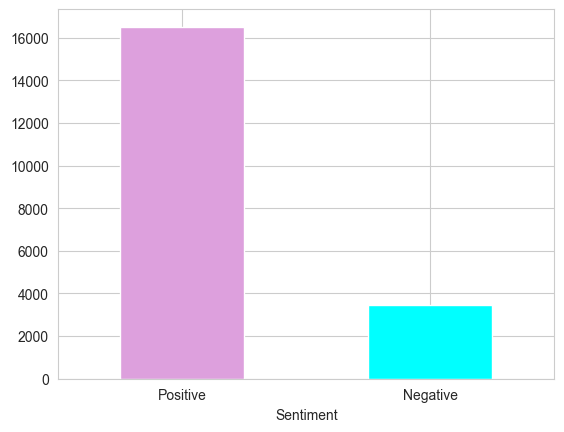

In [25]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [26]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3480,3480,3480
Positive,16520,16520,16520


In [27]:
df4.groupby("polarity").max().head(5)
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,"wrong! said nsa &amp; cia, others convinces us...","[wrong, said, nsa, amp, cia, others, convinces...",Negative
-1.000000,@thebotanophile @jasonmillerindc @realdonaldtr...,"[thebotanophile, jasonmillerindc, realdonaldtr...",Negative
-0.976563,@the_newright everyone knows false news fromtn...,"[the_newright, everyone, knows, false, news, f...",Negative
-0.976562,exxonmobil helped defeat russia sanctions bill...,"[politicususa, joe, amp, mika, trump, putin, c...",Negative
-0.953674,really wan informed watch @cbsthismorning !!!!...,"[really, wan, informed, watch, cbsthismorning,...",Negative


Text(0.5, 1.0, 'Polarity Distribution')

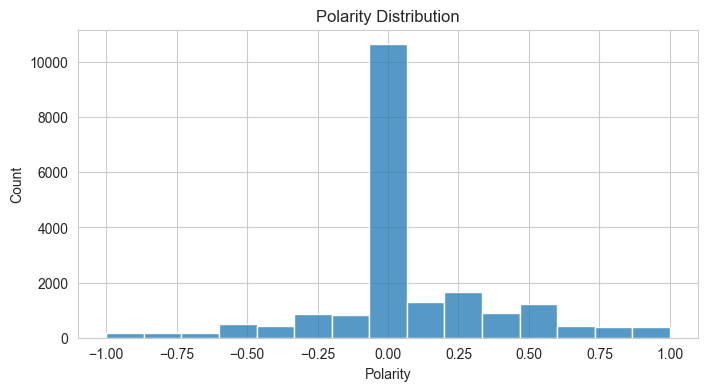

In [28]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

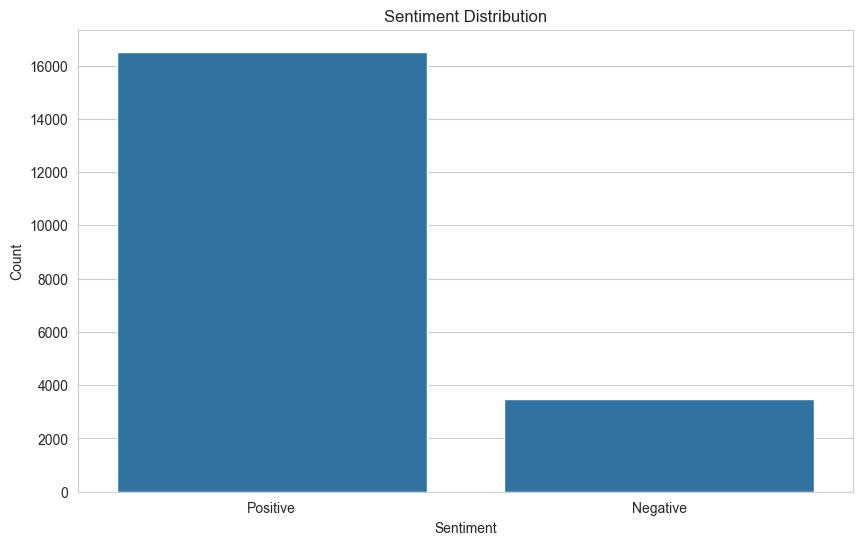

In [29]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

**KNN Classifier**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [32]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [33]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8465


In [35]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 84.65 %


In [36]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.79      0.18      0.29       705
    Positive       0.85      0.99      0.91      3295

    accuracy                           0.85      4000
   macro avg       0.82      0.58      0.60      4000
weighted avg       0.84      0.85      0.80      4000



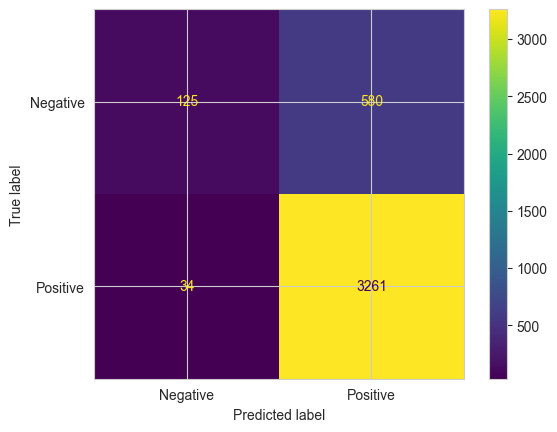

In [37]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()